# Identifikasi Kertas Gunting Batu

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-05-21 20:00:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  12.9MB/s    in 27s     

2020-05-21 20:00:39 (11.3 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
data_dir = os.path.join(base_dir, 'rps-cv-images')

In [5]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [0]:
# membuat direktori kertas pada direktori data training
train_paper_dir = os.path.join(data_dir, 'paper')

# membuat direktori batu direktori data training
train_rock_dir = os.path.join(data_dir, 'rock')

# membuat direktori gunting pada direktori data training
train_scissors_dir = os.path.join(data_dir, 'scissors')

# membuat direktori ruangan rapi pada direktori data validasi
validation_paper_dir = os.path.join(data_dir, 'paper')

# membuat direktori batu pada direktori data validasi
validation_rock_dir = os.path.join(data_dir, 'rock')

# membuat direktori gunting pada direktori data validasi
validation_scissors_dir = os.path.join(data_dir, 'scissors')

In [0]:
img_generator = ImageDataGenerator(
                                  validation_split=0.2,
                                  rescale = 1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip = True
                                  )

In [8]:
train_generator = img_generator.flow_from_directory(
        data_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        shuffle=True,
        subset='training')

validation_generator = img_generator.flow_from_directory(
        data_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        shuffle=False,
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 14,978,883
Trainable params: 264,195
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
process = model.fit(
                train_generator,
                steps_per_epoch=20,  # berapa batch yang akan dieksekusi pada setiap epoch
                epochs=10,
                validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
                verbose=2)

Epoch 1/10
20/20 - 152s - loss: 0.8106 - accuracy: 0.6513 - val_loss: 0.6890 - val_accuracy: 0.7625
Epoch 2/10
20/20 - 153s - loss: 0.3788 - accuracy: 0.8953 - val_loss: 0.4758 - val_accuracy: 0.8438
Epoch 3/10
20/20 - 156s - loss: 0.2306 - accuracy: 0.9469 - val_loss: 0.2696 - val_accuracy: 0.9062
Epoch 4/10
20/20 - 151s - loss: 0.1812 - accuracy: 0.9493 - val_loss: 0.2463 - val_accuracy: 0.9062
Epoch 5/10
20/20 - 153s - loss: 0.1683 - accuracy: 0.9469 - val_loss: 0.1683 - val_accuracy: 0.9438
Epoch 6/10
20/20 - 152s - loss: 0.1641 - accuracy: 0.9477 - val_loss: 0.1821 - val_accuracy: 0.9375
Epoch 7/10
20/20 - 155s - loss: 0.1203 - accuracy: 0.9683 - val_loss: 0.1001 - val_accuracy: 0.9688
Epoch 8/10
20/20 - 154s - loss: 0.1130 - accuracy: 0.9641 - val_loss: 0.0579 - val_accuracy: 0.9937
Epoch 9/10
20/20 - 152s - loss: 0.0979 - accuracy: 0.9715 - val_loss: 0.1859 - val_accuracy: 0.9312
Epoch 10/10
20/20 - 152s - loss: 0.0968 - accuracy: 0.9699 - val_loss: 0.0729 - val_accuracy: 0.9812

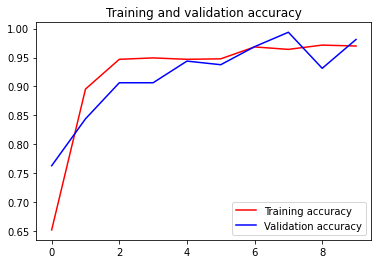

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = process.history['accuracy']
val_acc = process.history['val_accuracy']
loss = process.history['loss']
val_loss = process.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving IMG_20200520_052247.jpg to IMG_20200520_052247.jpg
IMG_20200520_052247.jpg
Kertas


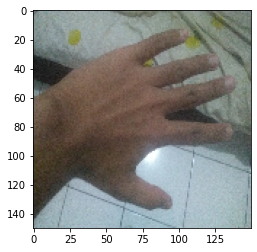

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = np.argmax(model.predict(images))
  #classes = model.predict_classes(images, batch_size=10)
  
  print(fn)
#  print(classes)
  if classes==0:
    print('Kertas')
  elif classes==1:
    print('Batu')
  else:
    print('Gunting')